<a href="https://colab.research.google.com/github/Kaavyesh/Diamond_price_prediction-regression/blob/main/AI_web_app_for_diamond_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=False)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(URL)

df.head()

,s,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [70]:
df = df.drop(["s"], axis=1)

In [71]:
df = df.drop(["x","y",'z'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [72]:
#lets make a copy of the data
df1 = df

In [73]:
df1.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [74]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df1.columns:
  if df1.dtypes[column] == 'object':
    df1[column] = label_encoder.fit_transform(df1[column])
print(df1.head())

   carat  cut  color  clarity  depth  table  price
0   0.23    2      1        3   61.5   55.0    326
1   0.21    3      1        2   59.8   61.0    326
2   0.23    1      1        4   56.9   65.0    327
3   0.29    3      5        5   62.4   58.0    334
4   0.31    1      6        3   63.3   58.0    335


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 MB


In [76]:
correlation_matrix = df1.corr()
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_target)

price      1.000000
carat      0.921591
color      0.172511
table      0.127134
cut        0.039860
depth     -0.010647
clarity   -0.071535
Name: price, dtype: float64


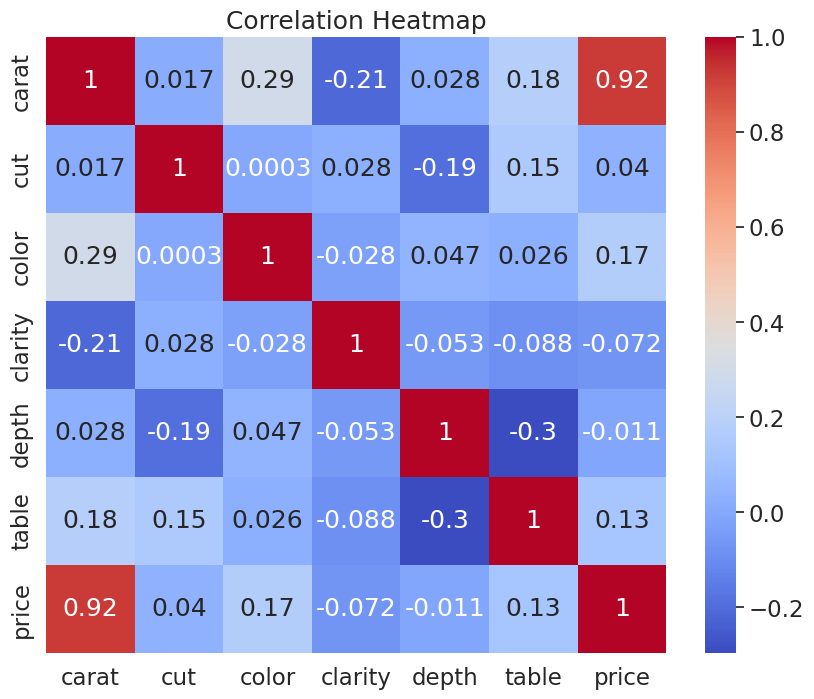

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [78]:
df1 = df1.drop(["cut", "depth", "table"], axis=1)
df1.head()

,carat,color,clarity,price
0,0.23,1,3,326
1,0.21,1,2,326
2,0.23,1,4,327
3,0.29,5,5,334
4,0.31,6,3,335


In [79]:
x = df1.drop(['price'],axis = 1 )
y = df1['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42 )

In [80]:
iso = IsolationForest(contamination=0.1, random_state=42)
outlier_predictions_train = iso.fit_predict(x_train)

# Select non-outlier rows
non_outlier_mask = outlier_predictions_train != -1
x_train, y_train = x_train.loc[non_outlier_mask], y_train.loc[non_outlier_mask]

# Summarize the shape of the updated training dataset
print("Shape of updated training data - X_train:", x_train.shape)
print("Shape of updated training data - y_train:", y_train.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Shape of updated training data - X_train: (38837, 3)
Shape of updated training data - y_train: (38837,)


In [81]:

from sklearn.pipeline import Pipeline
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('AdaBoost Regression', AdaBoostRegressor()),
    ('Ridge Regression', Ridge()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('KNeighbours Regression', KNeighborsRegressor())
]

# Create a pipeline for each model and evaluate its performance
for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    # Fit the model
    pipeline.fit(x_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(x_test)

    # Calculate MAE, MSE, and R-squared
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results for each model
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")
    print("\n")

Model: Linear Regression
MAE: 911.9800893468088
MSE: 1972461.3475101374
R-squared: 0.8759210227303745


Model: Lasso Regression
MAE: 911.442199955554
MSE: 1973304.326832858
R-squared: 0.8758679945621142


Model: AdaBoost Regression
MAE: 921.8222227654006
MSE: 1930149.1434547466
R-squared: 0.8785826997319764


Model: Ridge Regression
MAE: 911.8830361695686
MSE: 1972580.3357198231
R-squared: 0.8759135376988509


Model: Gradient Boosting Regression
MAE: 449.7146758319476
MSE: 1068043.9959738858
R-squared: 0.9328139905673246


Model: Random Forest Regression
MAE: 417.4988337261908
MSE: 1025953.1810134208
R-squared: 0.9354617409424242


Model: KNeighbours Regression
MAE: 613.2599740452355
MSE: 2457103.806536893
R-squared: 0.8454342703621296




In [82]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

In [83]:
import mercury as mr
import math

ModuleNotFoundError: ignored

In [ ]:
app = mr.App(title="💎 Diamond Price Prediction",description="",show_code=False)

In [ ]:
# Use the `mr.Note` widget to display a Markdown text. It's used here to prompt the user to select a metric using the slider.
mr.Note(text="__Select the metrics to see the prediction__")

# Calculate the maximum and minimum values of the feature columns in the `DataFrame`. These values will define the range of the sliders.
c1_max = df['carat'].max()
c1_min = df['carat'].min()
# a slider widget capable of handling decimal numbers
carat = mr.Numeric(label="Carat", value=c1_min, min=c1_min, max=c1_max, step=0.1)

c2_max = df['color'].max()
c2_min = df['color'].min()
# a slider widget capable of handling whole numbers
color = mr.Slider(label="Color", value=c2_min, min=c2_min, max=c2_max)

c3_max = df['clarity'].max()
c3_min = df['clarity'].min()
clarity = mr.Slider(label="Clarity", value=c3_min, min=c3_min, max=c3_max)

# display numbers in large boxes with title
mr.NumberBox(data="Predicted Price in USD: $" + str(math.ceil((float(rf_model.predict(np.array([[carat.value, color.value, clarity.value]])))))))

In [ ]:
# display numbers in a row of three boxes
mr.NumberBox([
    mr.NumberBox(data=carat.value, title="Carat"),
    mr.NumberBox(data=color.value, title="Color"),
    mr.NumberBox(data=clarity.value, title="Clarity")
])